<a href="https://colab.research.google.com/github/lisssika/for_Dvoynishnicov/blob/main/Problem_2_corr_and_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rect(t):
    return np.where(abs(t) <= 0.5, 1, 0)

In [ ]:
def phi_RC(t):
  return np.where(t>=0, np.exp(-t/1.0), 0)

Условия:

In [ ]:
N = 1000
T = 6
step = float(T)/N
start, stop = -T/2, T/2
x_ = np.arange(start, stop, step)
x_conv = np.arange(-T, T-step, step)

In [ ]:
rect_arr = rect(x_)
rc_arr = phi_RC(x_)

# Convolution 

In [ ]:
def conv_plot_and_conpare(f, a, b):
  fig, ax = plt.subplots(1, 3)
  fig.set_size_inches(25, 5)
  ax[0].plot(x_, a, x_, b)
  ax[0].set_title('signal')
  ax[1].plot(x_conv, f(a, b)*step)
  ax[1].set_title('my convolution')
  ax[2].plot(x_conv, np.convolve(a, b, 'full'))
  ax[2].set_title('numpy convolution')

In [ ]:
def convolution(x, h):
  [N, M] = map(len, [x, h])
  result = np.zeros(N + M - 1)

  for i in range(N):
    for j in range(M):
      result[i + j] += x[i] * h[j]

  return result

2 прямоугольных сигнала

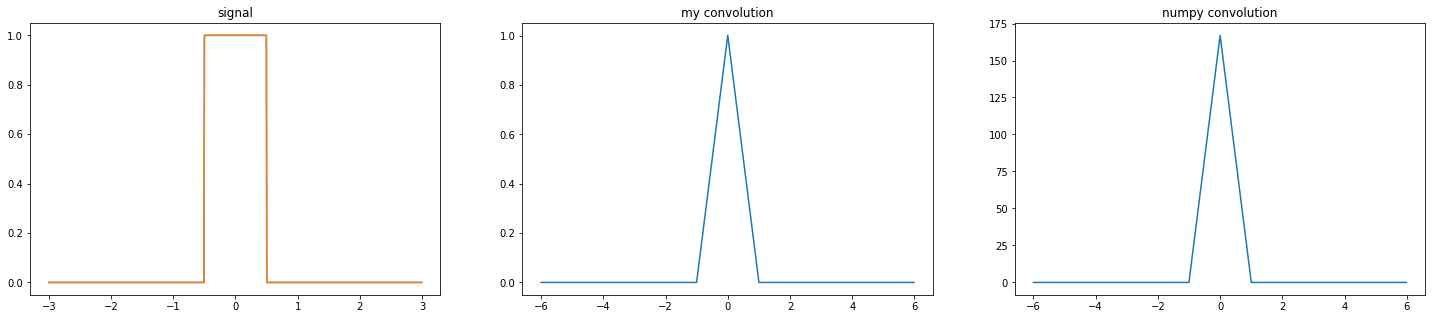

In [ ]:
conv_plot_and_conpare(convolution, rect_arr, rect_arr)

прямоугольник и RC

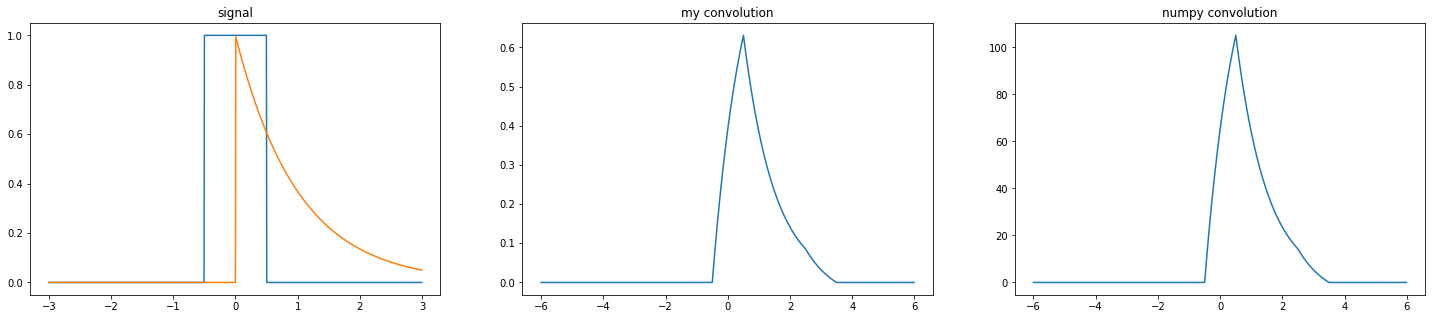

In [ ]:
conv_plot_and_conpare(convolution, rect_arr, rc_arr)

RC и прямоугольник

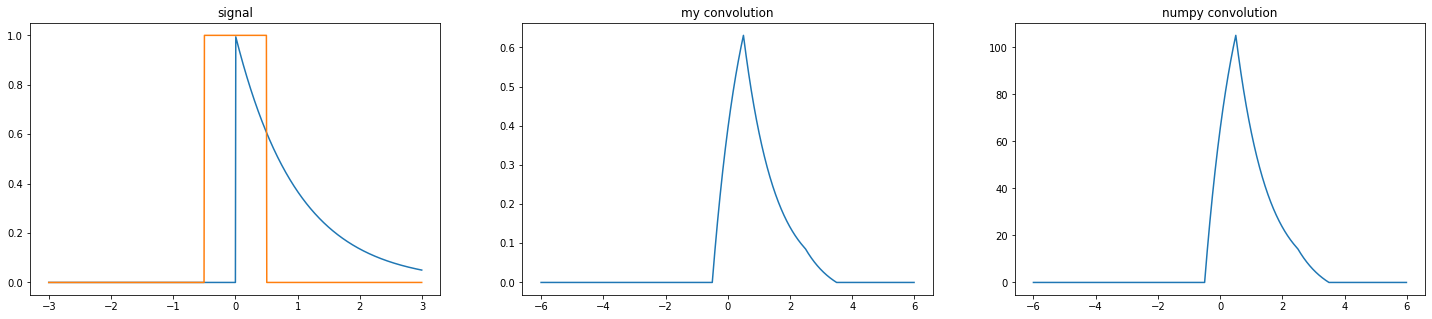

In [ ]:
conv_plot_and_conpare(convolution, rc_arr, rect_arr)

# Fast convolution

In [ ]:
def fast_convolution(x, h):
  [N, M] = map(len, [x, h])

  x_ = np.zeros(N + M - 1)
  x_[:N] = x
  h_ = np.zeros(N + M - 1)
  h_[:M] = h

  return np.real(np.fft.ifft(np.fft.fft(x_) * np.fft.fft(h_)))

2 прямоугольных сигнала

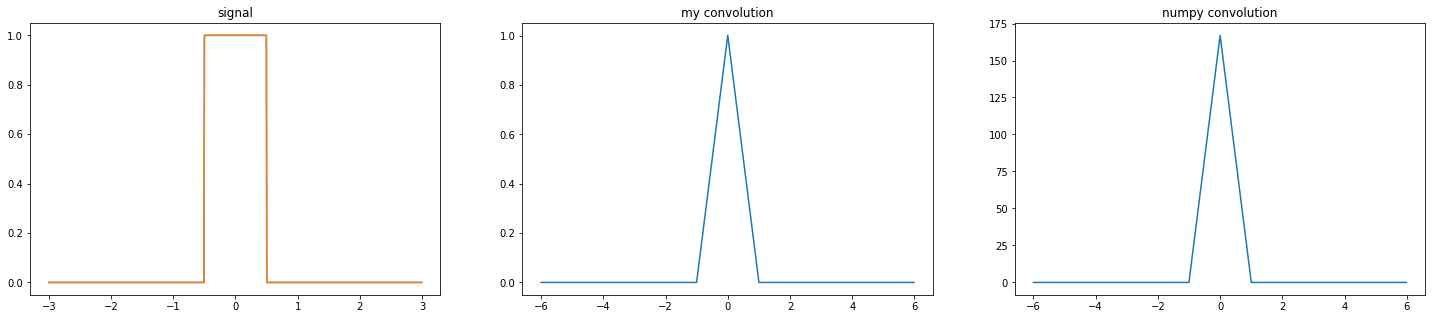

In [ ]:
conv_plot_and_conpare(fast_convolution, rect_arr, rect_arr)

Прямоугольник и RC

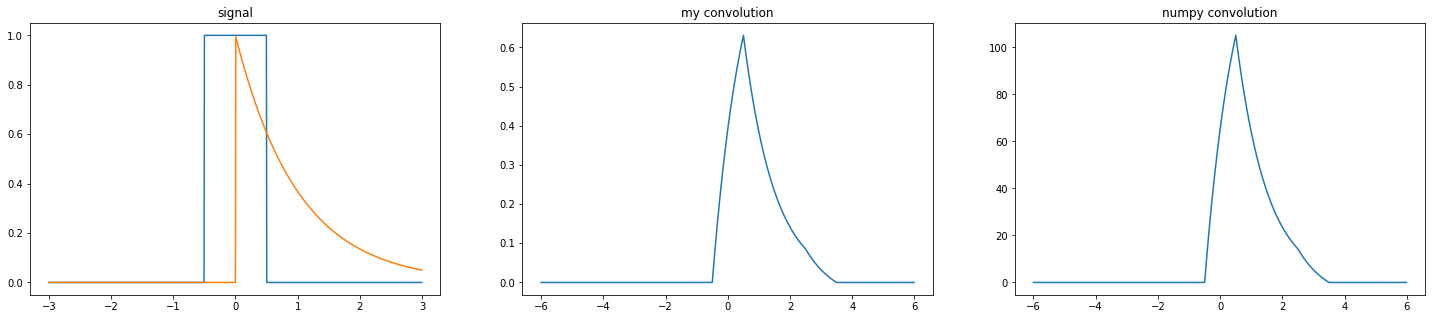

In [ ]:
conv_plot_and_conpare(fast_convolution, rect_arr, rc_arr)

# Cross-correlation

In [ ]:
def corr_plot_and_conpare(f, a, b):
  fig, ax = plt.subplots(1, 3)
  fig.set_size_inches(25, 5)
  ax[0].plot(x_, a, x_, b)
  ax[0].set_title('signal')
  ax[1].plot(x_conv, f(a, b)*step)
  ax[1].set_title('my correlation')
  ax[2].plot(x_conv, np.correlate(a, b, 'full'))
  ax[2].set_title('numpy correlation')

In [ ]:
def сross_correlation(x, h):
  [N, M] = map(len, [x, h])
  y = np.zeros(N + M - 1)
  h_=h[::-1]

  for i in range(N):
    for j in range(M):
      y[i + j] += x[i] * h_[j]

  return y

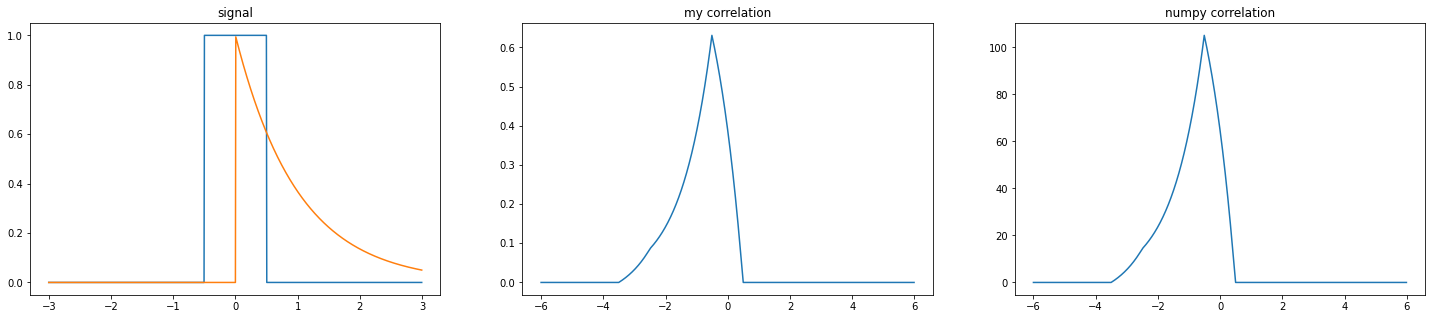

In [ ]:
corr_plot_and_conpare(сross_correlation, rect_arr, rc_arr)

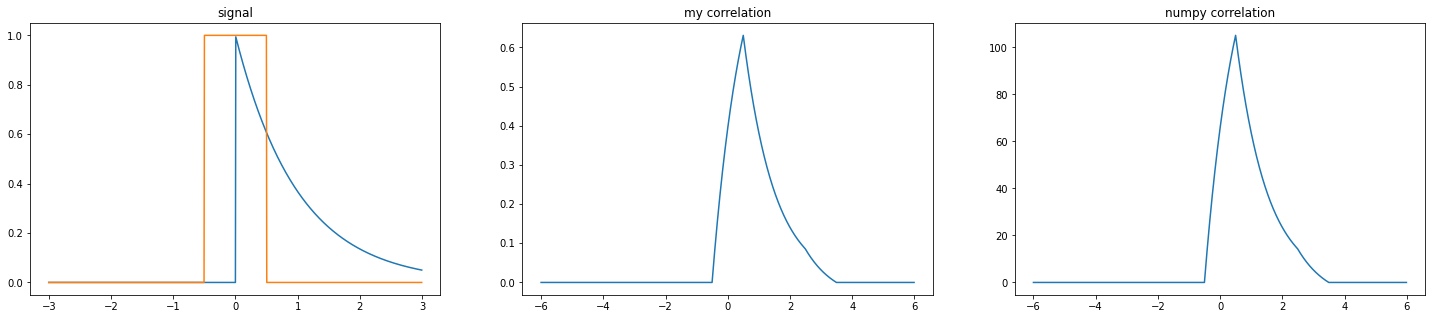

In [ ]:
corr_plot_and_conpare(сross_correlation, rc_arr, rect_arr)

# Fast cross-correlation

In [ ]:
def fast_correlation(x, h):
  N, M = map(len, (x, h))

  x_ = np.zeros(N + M - 1)
  x_[:N] = x
  h_ = np.zeros(N + M - 1)
  h_[:M] = h

  return np.real(np.fft.ifft(np.conj(np.fft.fft(x_)) * np.fft.fft(h_)))

[Сделала просто как тут, но что-то не работает](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Circular_convolution_theorem_and_cross-correlation_theorem)

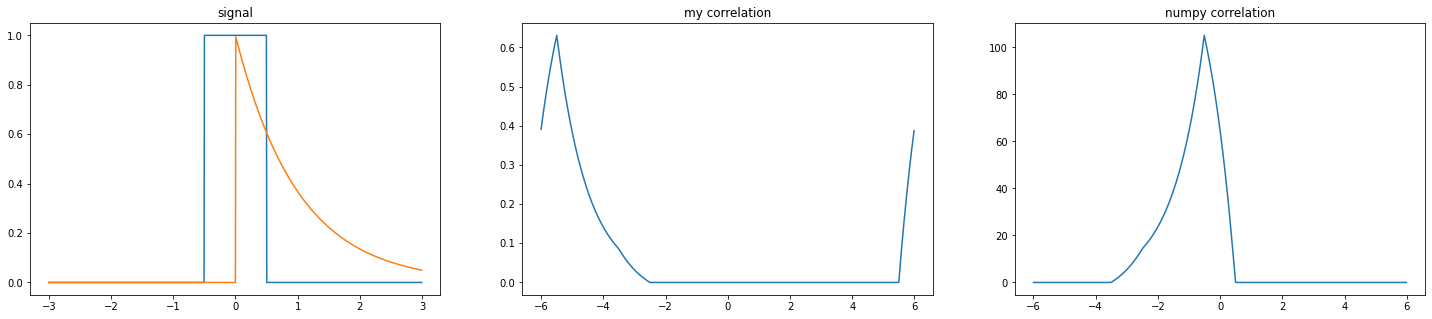

In [ ]:
corr_plot_and_conpare(fast_correlation, rect_arr, rc_arr)

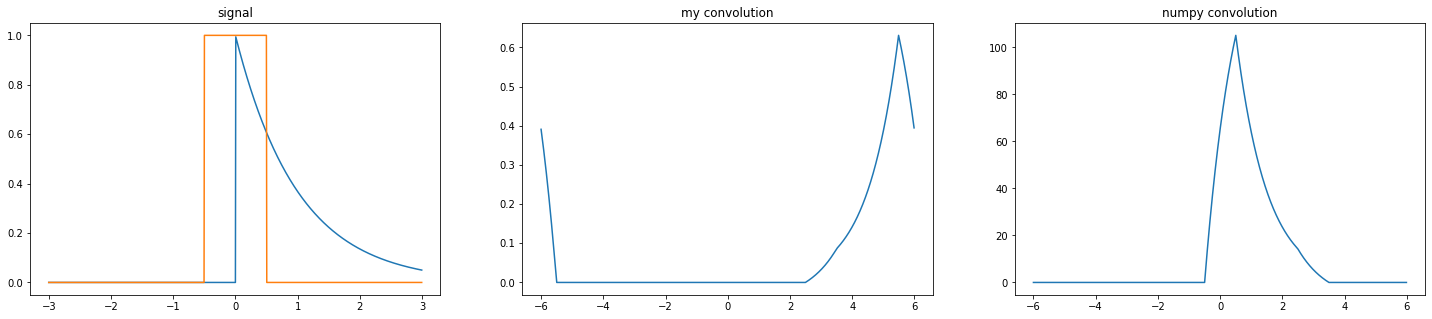

In [ ]:
conv_plot_and_conpare(fast_correlation, rc_arr, rect_arr)